In [1]:
import seaborn as sns
import pandas as pd

In [2]:
amazon = pd.read_csv("AmazonAlexa_Reviews.csv")

In [3]:
amazon.isnull().sum()

rating               0
date                 0
variation            0
verified_reviews    79
feedback             0
dtype: int64

In [4]:
amazon = amazon.dropna()

In [5]:
amazon.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<AxesSubplot:xlabel='feedback', ylabel='Count'>

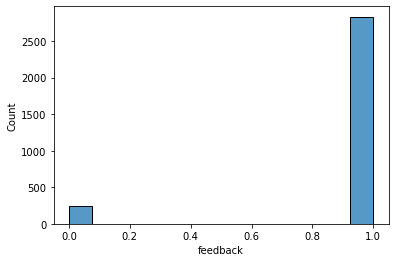

In [7]:
sns.histplot(x='feedback',data=amazon)

In [8]:
amazon['verified_reviews'] = amazon['verified_reviews'].apply(lambda x: x.lower())

In [9]:
amazon['verified_reviews']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3071, dtype: object

In [10]:
import string

In [11]:
def remove_punc(x):
    return "".join(i for i in x if i not in string.punctuation)

In [12]:
import emoji
import re

In [13]:
def remove_emoji(x):
    return emoji.demojize(x)

In [14]:
from nltk.corpus import stopwords

In [15]:
def rem_stop(x):
    return " ".join(i for i in x.split() if i not in stopwords.words('English'))

In [16]:
def tokenize(x):
    return re.split("W+",x)

In [17]:
def preprocess(x):
    return tokenize(remove_punc(remove_emoji(rem_stop(x))))

In [18]:
amazon['verified_reviews'] = amazon['verified_reviews'].apply(lambda x:preprocess(x))

In [19]:
amazon

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,[love echo],1
1,5,31-Jul-18,Charcoal Fabric,[loved it],1
2,4,31-Jul-18,Walnut Finish,[sometimes playing game answer question correc...,1
3,5,31-Jul-18,Charcoal Fabric,[lot fun thing 4 yr old learns dinosaurs contr...,1
4,5,31-Jul-18,Charcoal Fabric,[music],1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,[perfect kids adults everyone between],1
3146,5,30-Jul-18,Black Dot,[listening music searching locations checking ...,1
3147,5,30-Jul-18,Black Dot,[love things running entire home tv lights the...,1
3148,5,30-Jul-18,White Dot,[complaint sound quality great mostly use comm...,1


In [20]:
 from nltk.stem.porter import PorterStemmer

In [21]:
stemmer = PorterStemmer()

In [22]:
def stem(text):
    return " ".join(stemmer.stem(word) for word in text)

In [23]:
amazon['verified_reviews'] = amazon['verified_reviews'].apply(lambda x:stem(x))

In [24]:
amazon['verified_reviews']

0                                               love echo
1                                                loved it
2       sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   music
                              ...                        
3145                 perfect kids adults everyone between
3146    listening music searching locations checking t...
3147    love things running entire home tv lights ther...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: verified_reviews, Length: 3071, dtype: object

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def lemmatize(text):
    return " ".join(lemmatizer.lemmatize(word) for word in text.split())

In [28]:
amazon['verified_reviews'] = amazon['verified_reviews'].apply(lambda x:lemmatize(x))